#### Tanmay Bhatt
011499072
CMPE 258
Assignment 1

### Import statements

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
from sklearn.linear_model import LinearRegression
from __future__ import division
import tensorflow as tf
from sklearn.metrics import mean_squared_error

## 1 (10pts). Linear regression with one variable from scratch
Using Jupyter notebook, load the data (ex1data1.csv). Visualize data using scatter plot.
The first column is Population of City in 10,000s, and the second column is profit of food truck in 10,000.
In order to predict the profit, fit the data using gradient descent method (without matrix). You need to calculate
cost function and update weight using gradient descent method. Try several different learning rate. Please print
Root Mean Squared Error (RMSE) after optimization.

In [56]:
data = pd.read_csv('./ex1data1.csv', header=None)

In [57]:
X = data[0]
Y = data[1]
m = len(data)
print m

97


In [58]:
def predict(x):
    return w0 + w1*x

def calculate_cost(Y_pred):
    result = 0
    for y_pred,y in zip(Y_pred,Y):
        result += (y_pred - y)**2
    result /=m
    return result

def cost_derivative_0(Y_pred):
    result = 0
    for y_pred,y in zip(Y_pred,Y):
        result += (y_pred - y)
    result *=2
    result /=m
    return result

def cost_derivative_1(Y_pred):
    result = 0
    for y_pred,y,x in zip(Y_pred,Y,X):
        result += (y_pred - y) * x
    result *=2
    result /=m
    return result

def calculate_weights(rate,Y_pred):
    global w0
    global w1
    w0 = w0 - rate * cost_derivative_0(Y_pred)
    w1 = w1 - rate * cost_derivative_1(Y_pred)

In [59]:
w0 = 0
w1 = 0
count = 0
learning_rates = [0.1,0.01,0.001,0.0001,0.00001]
max_count = 1000
Y_pred = []
for x in X:
    Y_pred.append(predict(x))
print("RMSE before gradient descent",sqrt(calculate_cost(Y_pred)))

('RMSE before gradient descent', 8.009086574317406)


In [60]:
for rate  in learning_rates:
    w0 = 0
    w1 = 0
    count = 0
    max_count = 1000
    w0 = 0
    Y_pred = []
    for x in X:
        Y_pred.append(predict(x))
    current_cost = calculate_cost(Y_pred)
    new_cost = 1

    while new_cost < current_cost and count < max_count:
        current_cost = calculate_cost(Y_pred)
        calculate_weights(rate,Y_pred)
        Y_pred = []
        for x in X:
            Y_pred.append(predict(x))
        new_cost = calculate_cost(Y_pred)
        count += 1
    print "Iterations : %d" % count
    print "Last Cost : %f" % new_cost
    print "Second Last Cost : %f " % current_cost 
    print "Learning rate : %f " % rate
    print "w0 : %f " % w0
    print "w1 : %f" % w1
    print "RMSE : %f" % sqrt(calculate_cost(Y_pred))
    print "\n"

Iterations : 1000
Last Cost : 8.956041
Second Last Cost : 8.956057 
Learning rate : 0.010000 
w0 : -3.788419 
w1 : 1.182248
RMSE : 2.992665




### Best Result with Learning rate : 0.010000 

Iterations : 1000 <br />
Last Cost : 8.956041 <br />
Second Last Cost : 8.956057 <br /> 
Learning rate : 0.010000 <br />
w0 : -3.788419 <br />
w1 : 1.182248 <br />
RMSE : 2.992665 <br />

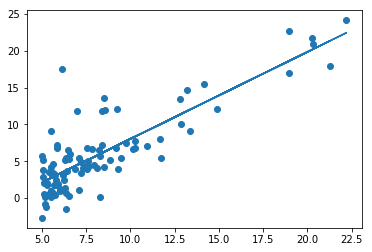

In [61]:
plt.scatter(data[0],data[1])
plt.plot(data[0],Y_pred)
plt.show()

## 2(30pts). Linear regression with two variables from scratch
Using Jupyter notebook, load the data (ex1data2.csv). Visualize data.
The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the
third column is the price of the house.
In order to predict the housing price, fit the data using gradient descent method (without matrix). You need to
normalize variables. You need to calculate cost function and update weight using gradient descent method. Try
several different learning rate. Please print the Root Mean Squared Error (RMSE) after optimization.

In [62]:
data = pd.read_csv('ex1data2.csv', header=None)

In [63]:
X1 = data[0]
X2 = data[1]
Y = data[2]
m = len(data)

X1 = X1.astype(float) 
X2 = X2.astype(float)

In [64]:
X1_min = X1.min()
print (X1_min)
X1_max = X1.max()
print X1_max

852.0
4478.0


In [65]:
X1_min = X1.min()
X1_max = X1.max()
X2_min = X2.min()
X2_max = X2.max()
i = 0
for x1,x2 in zip(X1,X2):
    X1[i] = ((x1 - X1_min)/(X1_max - X1_min))
    X2[i] = ((x2 - X2_min)/(X2_max - X2_min))
    i += 1

In [66]:
def predict(x1,x2):
    return w0 + w1*x1 + w2*x2

def calculate_cost(Y_pred):
    result = 0
    for y_pred,y in zip(Y_pred,Y):
        result += (y_pred - y)**2
    result /=m
    return result

def cost_derivative_0(Y_pred):
    result = 0
    for y_pred,y in zip(Y_pred,Y):
        result += (y_pred - y)
    result *=2
    result /=m
    return result

def cost_derivative_1(Y_pred):
    result = 0
    for y_pred,y,x1 in zip(Y_pred,Y,X1):
        result += (y_pred - y) * x1
    result *=2
    result /=m
    return result
def cost_derivative_2(Y_pred):
    result = 0
    for y_pred,y,x2 in zip(Y_pred,Y,X2):
        result += (y_pred - y) * x2
    result *=2
    result /=m
    return result

def calculate_weights(rate,Y_pred):
    global w0
    global w1
    global w2
    w0 = w0 - rate * cost_derivative_0(Y_pred)
    w1 = w1 - rate * cost_derivative_1(Y_pred)
    w2 = w2 - rate * cost_derivative_2(Y_pred)

In [67]:
w0 = 0
w1 = 0
w2 = 0
count = 0
learning_rates = [0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001,0.00000000001]
max_count = 1000
Y_pred = []
for x1,x2 in zip(X1,X2):
    Y_pred.append(predict(x1,x2))
print("RMSE before gradient descent",sqrt(calculate_cost(Y_pred)))

('RMSE before gradient descent', 362192.17480415246)


In [68]:
for rate  in learning_rates:
    w0 = 0
    w1 = 0
    w2 = 0
    count = 0
    max_count = 1000
    Y_pred = []
    for x1,x2 in zip(X1,X2):
        Y_pred.append(predict(x1,x2))
    len(Y_pred)
    current_cost = calculate_cost(Y_pred)
    new_cost = 1

    while new_cost < current_cost and count < max_count:
        current_cost = calculate_cost(Y_pred)
        calculate_weights(rate,Y_pred)
        Y_pred = []
        for x1,x2 in zip(X1,X2):
            Y_pred.append(predict(x1,x2))
        new_cost = calculate_cost(Y_pred)
        count += 1
    print "Iterations : %d" % count
    print "Last Cost : %lf" % new_cost
    print "Second Last Cost : %f " % current_cost 
    print "Learning rate : %f " % rate
    print "w0 : %f " % w0
    print "w1 : %f" % w1
    print "w2 : %f" % w2
    print "RMSE : %f" % sqrt(calculate_cost(Y_pred))
    print "\n"

Iterations : 1000
Last Cost : 4089308608.459870
Second Last Cost : 4089326941.073368 
Learning rate : 0.100000 
w0 : 196128.655623 
w1 : 497677.618939
w2 : -24754.055071
RMSE : 63947.702136




### Best Result with Learning rate : 0.10000 

Iterations : 1000 <br />
Last Cost : 4089308608.459870 <br />
Second Last Cost : 4089326941.073368 <br />
Learning rate : 0.100000 <br />
w0 : 196128.655623 <br />
w1 : 497677.618939 <br />
w2 : -24754.055071 <br />
RMSE : 63947.702136 <br />

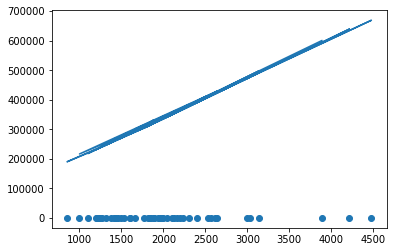

In [69]:
plt.scatter(data[0],data[1])
plt.plot(data[0],Y_pred)

## 2-1. Linear regression with two variables using matrix
Fit the data (ex1data2.csv) using matrix calculation. You need to normalize variables. You need to calculate
cost function and update weight.
Please print the Root Mean Squared Error (RMSE) after optimization.

In [16]:
X1 = data[0]
X2 = data[1]
Y = data[2]
m = len(data)

X1 = X1.astype(float) 
X2 = X2.astype(float)

In [17]:
X1_min = X1.min()
X1_max = X1.max()
X2_min = X2.min()
X2_max = X2.max()
i = 0
for x1,x2 in zip(X1,X2):
    X1[i] = ((x1 - X1_min)/(X1_max - X1_min))
    X2[i] = ((x2 - X2_min)/(X2_max - X2_min))
    i += 1

In [18]:
temp = pd.Series( (1 for i in range(0,len(data))) )

In [19]:
X_mat = np.asmatrix((np.column_stack((temp,X1,X2))))
W_mat = np.asmatrix(np.array([0., 0., 0.])).T
Y_mat = np.asmatrix((np.row_stack((Y))))
learning_rates = [0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001,0.00000000001]

In [20]:
print(X_mat).shape
print(Y_mat).shape
print(W_mat).shape

(47, 3)
(47, 1)
(3, 1)


In [21]:
def calculate_cost():
    result =  np.dot((np.matmul(X_mat,W_mat) - Y_mat).T,(np.matmul(X_mat,W_mat) - Y_mat))
    result /=m
    return float(result)

def cost_derivative():
    result = (np.matmul(np.matmul(X_mat.T,X_mat),W_mat)-(np.matmul(X_mat.T,Y_mat)))
    result *= 2
    result /=m
    return result

def calculate_weights(rate):
    global W_mat
    W_mat = W_mat - rate*cost_derivative()

In [22]:
for rate  in learning_rates:
    W_mat = np.asmatrix(np.array([0., 0., 0.])).T
    count = 0
    max_count = 1000
    current_cost = calculate_cost()
    new_cost = 0
    while new_cost < current_cost and count < max_count:
        current_cost = calculate_cost()
        calculate_weights(rate)
        new_cost = calculate_cost()
        count += 1
    print "Iterations : %d" % count
    print "Last Cost : %lf" % new_cost
    print "Second Last Cost : %f " % current_cost 
    print "Learning rate : %f " % rate
    print "w0 : %f " % W_mat[0]
    print "w1 : %f" % W_mat[1]
    print "w2 : %f" % W_mat[2]
    print "RMSE : %f" % sqrt(calculate_cost())
    print "\n"

Iterations : 1000
Last Cost : 4089308608.459871
Second Last Cost : 4089326941.073368 
Learning rate : 0.100000 
w0 : 196128.655623 
w1 : 497677.618939
w2 : -24754.055071
RMSE : 63947.702136


Iterations : 1000
Last Cost : 5748738122.622198
Second Last Cost : 5750576554.169697 
Learning rate : 0.010000 
w0 : 184853.786354 
w1 : 278567.520649
w2 : 126710.056154
RMSE : 75820.433411


Iterations : 1000
Last Cost : 9796267918.101746
Second Last Cost : 9799444614.727167 
Learning rate : 0.001000 
w0 : 220503.260541 
w1 : 105019.575118
w2 : 130537.263266
RMSE : 98976.097711


Iterations : 1000
Last Cost : 78893814028.973938
Second Last Cost : 78932753412.426193 
Learning rate : 0.000100 
w0 : 59194.384597 
w1 : 23144.181378
w2 : 33994.496394
RMSE : 280880.426568


Iterations : 1000
Last Cost : 124532273309.633743
Second Last Cost : 124538738613.938934 
Learning rate : 0.000010 
w0 : 6711.735791 
w1 : 2582.754669
w2 : 3845.450319
RMSE : 352891.305234


Iterations : 1000
Last Cost : 13050108492

## Best Result with Learning rate : 0.10000 

Iterations : 1000 <br/>
Last Cost : 4089308608.459870 <br/>
Second Last Cost : 4089326941.073366 <br/> 
Learning rate : 0.100000 <br/>
w0 : 196128.655623 <br/>
w1 : 497677.618939<br/>
w2 : -24754.055071<br/>
RMSE : 63947.702136<br/>


## 2-2. Linear regression with two variables using Normal equation
Fit the data (ex1data2.csv) using Normal equation. You need to calculate cost function and update weight

In [23]:
X1 = data[0]
X2 = data[1]
Y = data[2]
m = len(data)

X1 = X1.astype(float) 
X2 = X2.astype(float)

In [24]:
X1_min = X1.min()
X1_max = X1.max()
X2_min = X2.min()
X2_max = X2.max()
i = 0
for x1,x2 in zip(X1,X2):
    X1[i] = ((x1 - X1_min)/(X1_max - X1_min))
    X2[i] = ((x2 - X2_min)/(X2_max - X2_min))
    i += 1

In [25]:
temp = pd.Series( (1 for i in range(0,len(data))) )

In [26]:
X_mat = np.asmatrix((np.column_stack((temp,X1,X2))))
W_mat = np.asmatrix(np.array([0., 0., 0.])).T
Y_mat = np.asmatrix((np.row_stack((Y))))

In [27]:
print(X_mat).shape
print(Y_mat).shape
print(W_mat).shape

(47, 3)
(47, 1)
(3, 1)


In [28]:
def weight_function():
    global Y_mat
    result = np.matmul(np.matmul(np.matmul(X_mat.T,X_mat).I,X_mat.T),Y_mat)
    
    return result
def predict_Y(theta):
    result = np.matmul(X_mat,theta)
    return result
def calculate_cost(Y_pred):
    result = 0
    for i in range(0,len(Y_pred)):
        result += (Y_pred[i] - Y_mat[i])**2
    result /=m
    return result   

In [29]:
theta = weight_function()
Y_pred = predict_Y(theta)

In [30]:
print "w0 : %f " % theta[0]
print "w1 : %f" % theta[1]
print "w2 : %f" % theta[2]
print "RMSE : %f" % sqrt(calculate_cost(Y_pred))
print "\n"

w0 : 199467.311263 
w1 : 504777.761242
w2 : -34951.661681
RMSE : 63926.214926




## Result for Normal equation

w0 : 199467.311263 <br />
w1 : 504777.761242 <br />
w2 : -34951.661681 <br />
RMSE : 63926.214926 <br />

## 3(60pts). Linear regression with multiple variables
Using Jupyter notebook, load the data (ex1data3.csv).
This is California housing dataset. The original database is available from http://lib.stat.cmu.edu
The data contains 20,640 observations on 9 variables. This dataset contains the average house value as target
variable and the following input variables (features): average income, housing average age, average rooms,
average bedrooms, population, average occupation, latitude, and longitude
(R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,\nStatistics and Probability Letters, 33 (1997)
291-297) .

## 3-1. Linear regression with multiple variables using matrix
Fit the data (ex1data3.csv) using matrix calculation. You need to calculate cost function and update weight.
You need to normalize variables. Please print the Root Mean Squared Error (RMSE) after optimization.

In [31]:
data = pd.read_csv('./ex1data3.csv', header=None)

In [32]:
X1 = data[0]
X2 = data[1]
X3 = data[2]
X4 = data[3]
X5 = data[4]
X6 = data[5]
X7 = data[6]
X8 = data[7]
Y = data[8]
m = len(data)

X1 = X1.astype(float) 
X2 = X2.astype(float)
X3 = X3.astype(float) 
X4 = X4.astype(float)
X5 = X5.astype(float) 
X6 = X6.astype(float)
X7 = X7.astype(float) 
X8 = X8.astype(float)

In [33]:
X1_min = X1.min()
X2_min = X2.min()
X3_min = X3.min()
X4_min = X4.min()
X5_min = X5.min()
X6_min = X6.min()
X7_min = X7.min()
X8_min = X8.min()
X1_max = X1.max()
X2_max = X2.max()
X3_max = X3.max()
X4_max = X4.max()
X5_max = X5.max()
X6_max = X6.max()
X7_max = X7.max()
X8_max = X8.max()

In [34]:
i = 0
for x1,x2,x3,x4,x5,x6,x7,x8 in zip(X1,X2,X3,X4,X5,X6,X7,X8):
    X1[i] = ((x1 - X1_min)/(X1_max - X1_min))
    X2[i] = ((x2 - X2_min)/(X2_max - X2_min))
    X3[i] = ((x3 - X3_min)/(X3_max - X3_min))
    X4[i] = ((x4 - X4_min)/(X4_max - X4_min))
    X5[i] = ((x5 - X5_min)/(X5_max - X5_min))
    X6[i] = ((x6 - X6_min)/(X6_max - X6_min))
    X7[i] = ((x7 - X7_min)/(X7_max - X7_min))
    X8[i] = ((x8 - X8_min)/(X8_max - X8_min))
    i += 1

In [35]:
temp = pd.Series( (1 for i in range(0,len(data))) )

In [36]:
X_mat = np.asmatrix((np.column_stack((temp,X1,X2,X3,X4,X5,X6,X7,X8))))
W_mat = np.asmatrix(np.array([0., 0., 0., 0., 0., 0., 0., 0., 0.])).T
Y_mat = np.asmatrix((np.row_stack((Y))))
learning_rates = [0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001,0.00000000001]

In [37]:
def calculate_cost():
    result =  np.dot((np.matmul(X_mat,W_mat) - Y_mat).T,(np.matmul(X_mat,W_mat) - Y_mat))
    result /=m
    return float(result)

def cost_derivative():
    result = (np.matmul(np.matmul(X_mat.T,X_mat),W_mat)-(np.matmul(X_mat.T,Y_mat)))
    result *= 2
    result /=m
    return result

def calculate_weights(rate):
    global W_mat
    W_mat = W_mat - rate*cost_derivative()

In [38]:
for rate  in learning_rates:
    W_mat = np.asmatrix(np.array([0., 0., 0., 0., 0., 0., 0., 0., 0.])).T
    count = 0
    max_count = 1000
    current_cost = calculate_cost()
    new_cost = 0
    while new_cost < current_cost and count < max_count:
        current_cost = calculate_cost()
        calculate_weights(rate)
        new_cost = calculate_cost()
        count += 1
    print "Iterations : %d" % count
    print "Last Cost : %lf" % new_cost
    print "Second Last Cost : %f " % current_cost 
    print "Learning rate : %f " % rate
    print "w0 : %f " % W_mat[0]
    print "w1 : %f" % W_mat[1]
    print "w2 : %f" % W_mat[2]
    print "w3 : %f " % W_mat[3]
    print "w4 : %f" % W_mat[4]
    print "w5 : %f" % W_mat[5]
    print "w6 : %f " % W_mat[6]
    print "w7 : %f" % W_mat[7]
    print "w8 : %f" % W_mat[8]
    print "RMSE : %f" % sqrt(calculate_cost())
    print "\n"

Iterations : 1000
Last Cost : 0.579215
Second Last Cost : 0.579251 
Learning rate : 0.100000 
w0 : 1.703980 
w1 : 5.861136
w2 : 0.776703
w3 : 0.154956 
w4 : 0.072752
w5 : 0.142323
w6 : -0.063152 
w7 : -1.788810
w8 : -1.780212
RMSE : 0.761062


Iterations : 1000
Last Cost : 0.959612
Second Last Cost : 0.959848 
Learning rate : 0.010000 
w0 : 1.191202 
w1 : 2.005130
w2 : 0.626023
w3 : 0.089956 
w4 : 0.016753
w5 : 0.053652
w6 : -0.003183 
w7 : -0.103988
w8 : 0.213868
RMSE : 0.979598


Iterations : 1000
Last Cost : 1.258245
Second Last Cost : 1.258322 
Learning rate : 0.001000 
w0 : 1.176971 
w1 : 0.476372
w2 : 0.645939
w3 : 0.044408 
w4 : 0.025288
w5 : 0.047160
w6 : 0.001749 
w7 : 0.319798
w8 : 0.533617
RMSE : 1.121715


Iterations : 1000
Last Cost : 3.482436
Second Last Cost : 3.483925 
Learning rate : 0.000100 
w0 : 0.350871 
w1 : 0.102299
w2 : 0.195047
w3 : 0.012016 
w4 : 0.007792
w5 : 0.013852
w6 : 0.000625 
w7 : 0.107888
w8 : 0.164840
RMSE : 1.866129


Iterations : 1000
Last Cost : 5

## Best Result with Learning rate : 0.10000 

Iterations : 1000 <br />
Last Cost : 0.579215 <br />
Second Last Cost : 0.579251 <br /> 
Learning rate : 0.100000 <br />
w0 : 1.703980 <br />
w1 : 5.861136<br />
w2 : 0.776703<br />
w3 : 0.154956 <br />
w4 : 0.072752<br />
w5 : 0.142323<br />
w6 : -0.063152 <br />
w7 : -1.788810<br />
w8 : -1.780212<br />
RMSE : 0.761062<br />

## 3-2. Linear regression with multiple variables using Normal equation
Fit the data (ex1data3.csv) using Normal equation. You need to calculate cost function and update weight.
Please print the best Root Mean Squared Error (RMSE) after optimization.

In [39]:
X1 = data[0]
X2 = data[1]
X3 = data[2]
X4 = data[3]
X5 = data[4]
X6 = data[5]
X7 = data[6]
X8 = data[7]
Y = data[8]
m = len(data)

X1 = X1.astype(float) 
X2 = X2.astype(float)
X3 = X3.astype(float) 
X4 = X4.astype(float)
X5 = X5.astype(float) 
X6 = X6.astype(float)
X7 = X7.astype(float) 
X8 = X8.astype(float)

In [40]:
X1_min = X1.min()
X2_min = X2.min()
X3_min = X3.min()
X4_min = X4.min()
X5_min = X5.min()
X6_min = X6.min()
X7_min = X7.min()
X8_min = X8.min()
X1_max = X1.max()
X2_max = X2.max()
X3_max = X3.max()
X4_max = X4.max()
X5_max = X5.max()
X6_max = X6.max()
X7_max = X7.max()
X8_max = X8.max()

In [41]:
i = 0
for x1,x2,x3,x4,x5,x6,x7,x8 in zip(X1,X2,X3,X4,X5,X6,X7,X8):
    X1[i] = ((x1 - X1_min)/(X1_max - X1_min))
    X2[i] = ((x2 - X2_min)/(X2_max - X2_min))
    X3[i] = ((x3 - X3_min)/(X3_max - X3_min))
    X4[i] = ((x4 - X4_min)/(X4_max - X4_min))
    X5[i] = ((x5 - X5_min)/(X5_max - X5_min))
    X6[i] = ((x6 - X6_min)/(X6_max - X6_min))
    X7[i] = ((x7 - X7_min)/(X7_max - X7_min))
    X8[i] = ((x8 - X8_min)/(X8_max - X8_min))
    i += 1

In [42]:
temp = pd.Series( (1 for i in range(0,len(data))) )

In [43]:
X_mat = np.asmatrix((np.column_stack((temp,X1,X2,X3,X4,X5,X6,X7,X8))))
W_mat = np.asmatrix(np.array([0., 0., 0., 0., 0., 0., 0., 0., 0.])).T
Y_mat = np.asmatrix((np.row_stack((Y))))
learning_rates = [0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001,0.00000000001]

In [44]:
def weight_function():
    global Y_mat
    result = np.matmul(np.matmul(np.matmul(X_mat.T,X_mat).I,X_mat.T),Y_mat)
    return result
def predict_Y(theta):
    result = np.matmul(X_mat,theta)
    return result
def calculate_cost(Y_pred):
    result = 0
    for i in range(0,len(Y_pred)):
        result += (Y_pred[i] - Y_mat[i])**2
    result /=m
    return result   

In [45]:
theta = weight_function()
Y_pred = predict_Y(theta)

In [46]:
print "w0 : %f " % theta[0]
print "w1 : %f" % theta[1]
print "w2 : %f" % theta[2]
print "w3 : %f" % theta[3]
print "w4 : %f" % theta[4]
print "w5 : %f" % theta[5]
print "w6 : %f" % theta[6]
print "w7 : %f" % theta[7]
print "w8 : %f" % theta[8]
print "RMSE : %f" % sqrt(calculate_cost(Y_pred))
print "\n"

w0 : 3.729612 
w1 : 6.332140
w2 : 0.481225
w3 : -15.139162
w4 : 21.760216
w5 : -0.141874
w6 : -4.705313
w7 : -3.964568
w8 : -4.362518
RMSE : 0.724100




## Result of Normal Equation:
w0 : 3.729612 <br /> 
w1 : 6.332140 <br />
w2 : 0.481225<br />
w3 : -15.139162<br />
w4 : 21.760216<br />
w5 : -0.141874<br />
w6 : -4.705313<br />
w7 : -3.964568<br />
w8 : -4.362518<br />
RMSE : 0.724100<br />

## Linear regression with multiple variables using scikit-learn linear regression model
Fit the data (ex1data3.csv) using linear regression from scikit-learn library. You need to calculate cost function
and update weight.
Please print the best Root Mean Squared Error (RMSE) after optimization.

### Done a Min-Max Normalization using code from above.

In [47]:
my_model = LinearRegression()

In [48]:
my_model.fit(X_mat,Y_mat)
result = my_model.predict(X_mat)

In [49]:
print "RMSE is %f " % sqrt(mean_squared_error(Y_mat,result))

RMSE is 0.724100 


## Result of Scikit learn Linear Regression

RMSE is : 0.724100

## 3-4. Linear regression with multiple variables using TensorFlow
Fit the data (ex1data3.csv) using linear regression using TensorFlow. You need to normalize variables. You
need to calculate cost function and update weight using gradient descent method instead of Normal equation.
Please print the best Root Mean Squared Error (RMSE) after optimization.

In [50]:
import numpy as np
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
m, n = housing.data.shape
X = tf.constant(X_mat, dtype=tf.float32, name="X")
y = tf.constant(Y_mat, dtype=tf.float32, name="y")
XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y)
with tf.Session() as sess:
    theta_value = theta.eval()

In [51]:
theta_value

array([[  3.72974086],
       [  6.33249378],
       [  0.48119265],
       [-15.14693642],
       [ 21.76514816],
       [ -0.14191604],
       [ -4.70538664],
       [ -3.96461535],
       [ -4.3626194 ]], dtype=float32)

In [52]:
(X_mat.shape[1])

9

In [53]:
n_epochs = 1000
learning_rate = 0.1
X = tf.constant(X_mat, dtype=tf.float32, name="X")
y = tf.constant(Y_mat, dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([X_mat.shape[1], 1], -1.0, 1.0), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
rmse = tf.sqrt(tf.reduce_mean(tf.square(error), name="rmse"))
gradients = 2/m * tf.matmul(tf.transpose(X), error)
training_op = tf.assign(theta, theta - learning_rate * gradients)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "RMSE =", rmse.eval())
        sess.run(training_op)
    best_theta = theta.eval()

('Epoch', 0, 'RMSE =', 2.5471997)
('Epoch', 100, 'RMSE =', 0.96276641)
('Epoch', 200, 'RMSE =', 0.87829679)
('Epoch', 300, 'RMSE =', 0.83100903)
('Epoch', 400, 'RMSE =', 0.80427802)
('Epoch', 500, 'RMSE =', 0.78879064)
('Epoch', 600, 'RMSE =', 0.77936673)
('Epoch', 700, 'RMSE =', 0.77321076)
('Epoch', 800, 'RMSE =', 0.76884234)
('Epoch', 900, 'RMSE =', 0.76548481)


## Result of Tensor flow Gradient descent:
Iterations : 1000 <br />

Learning rate : 0.1 <br />

RMSE : 0.76548481<br />